# **Handwritten Digits Classification: MNIST Dataset**

Importing the dataset file

In [267]:
from tensorflow.keras.datasets import mnist
import cv2

In [268]:
(TEMP, TEMP2), (X, Y) = mnist.load_data()
print('X_test:  '  + str(X.shape))
print('Y_test:  '  + str(Y.shape))

X_resized = np.zeros((X.shape[0], 10, 10), dtype=np.uint8)

# Resize each image from 28x28 to 10x10
for i in range(X.shape[0]):
    X_resized[i] = cv2.resize(X[i], (10, 10))

print('New shape:', X_resized.shape)

X_test:  (10000, 28, 28)
Y_test:  (10000,)
New shape: (10000, 10, 10)


Standardization of the Data: Z-Score Normalization

In [269]:
mean_px = X_resized.mean().astype(np.float32)
std_px = X_resized.std().astype(np.float32)
X_resized = (X_resized - mean_px)/(std_px)

Importing the necessary Libraries

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import random

Creating a Visual understading of the dataset

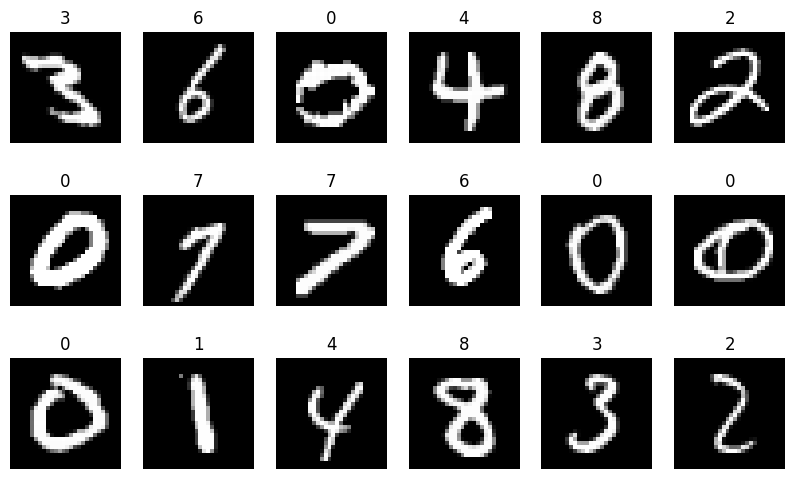

In [271]:
# Before Z score normalization
fig = plt.figure(figsize=(10,6))
fig.tight_layout()

random_indices = random.sample(range(len(Y)), 18)  # Get 6 random indices

for i, idx in enumerate(random_indices):
    plt.subplot(3, 6, i+1)
    plt.imshow(X[idx], cmap = 'gray')
    plt.title(Y[idx])
    plt.axis('off')

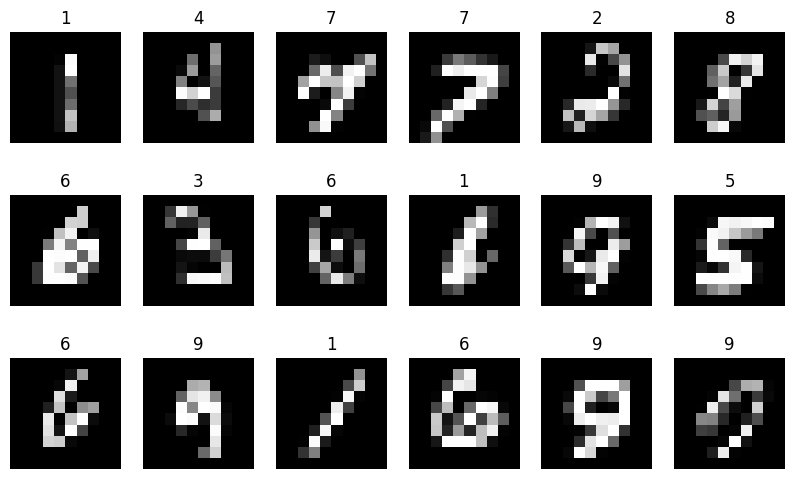

In [272]:
# After Z score normalization and resizing
fig = plt.figure(figsize=(10,6))
fig.tight_layout()

random_indices = random.sample(range(len(Y)), 18)  # Get 6 random indices

for i, idx in enumerate(random_indices):
    plt.subplot(3, 6, i+1)
    plt.imshow(X_resized[idx], cmap = 'gray')
    plt.title(Y[idx])
    plt.axis('off')

In [273]:
images = np.array(X)
labels = np.array(Y)
print('The shape of the images array is found to be',images.shape)
print('The shape of the Lables array is found to be',labels.shape)

The shape of the images array is found to be (10000, 28, 28)
The shape of the Lables array is found to be (10000,)


## Splitting Data



In [274]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
X_train = np.array([image.flatten() for image in X_train])
X_test = np.array([image.flatten() for image in X_test])
print("X train flatten",X_train.shape)
print("X test flatten",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X train flatten (7000, 784)
X test flatten (3000, 784)
y_train (7000,)
y_test (3000,)



# Logistic Regression






In [275]:
from sklearn.linear_model import LogisticRegression

In [276]:
model = LogisticRegression(max_iter=500, random_state=42)

In [277]:
start = time.time()
model.fit(X_train, y_train)
end = time.time()

In [278]:
Logistic_Pred = model.predict(X_test)

precision = precision_score(y_test,Logistic_Pred, average='weighted')
accuracy = accuracy_score(y_test,Logistic_Pred)
recall = recall_score(y_test,Logistic_Pred, average='weighted')
f1_sc = f1_score(y_test,Logistic_Pred, average='weighted')
Logistic_CM = confusion_matrix(y_test, Logistic_Pred)
print('Time for Training: ', end - start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('confusion_matrix', Logistic_CM)

Time for Training:  12.143858909606934
precision: 0.8859678499211832
accuracy: 0.8853333333333333
recall: 0.8853333333333333
f1_score: 0.8853682787115241
confusion_matrix [[267   0   3   1   0   9   7   0   3   0]
 [  0 335   2   1   0   2   0   2   4   0]
 [  1   3 268   4   7   3   7   7  10   5]
 [  0   0   6 272   0  10   0   7   3   6]
 [  0   0   4   1 273   1  10   2   4  20]
 [  0   3   2  11   7 203   6   3  12   2]
 [  4   1   4   0   5  10 256   5   4   2]
 [  2   1   0   2   4   0   1 277   2   9]
 [  3   3   7  11   2  15   1   5 233   6]
 [  3   2   0   6  11   3   0   6   3 272]]


In [279]:
# Results of training
metrics = ['Precision', 'Accuracy', 'Recall', 'F1 Score', 'time']
Algorithms = ['SGD-Logistic Regression', 'K-Nearest Neighbors Classifier',
              'Decisiion Tree Classifier', 'Random Forest Classification', 'Support Vector Machines']
Comparison = pd.DataFrame(columns = Algorithms, index = metrics)


Comparison['SGD-Logistic Regression'] = [precision, accuracy, recall, f1_sc, end - start]

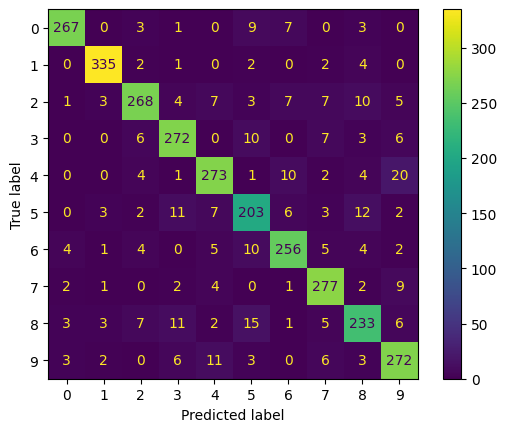

In [280]:
fig = ConfusionMatrixDisplay(Logistic_CM)
fig.plot()

<!-- K-Nearest Neighbors Classifier -->

K-Neighbors Classifier

In [281]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
start = time.time()
KNN_model.fit(X_train, y_train)
end = time.time()

In [283]:
KNN_pred = KNN_model.predict(X_test)

precision = precision_score(y_test,KNN_pred, average='weighted')
accuracy = accuracy_score(y_test,KNN_pred)
recall = recall_score(y_test,KNN_pred, average='weighted')
f1_sc = f1_score(y_test,KNN_pred, average='weighted')
KNN_CM = confusion_matrix(y_test, KNN_pred)
print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', KNN_CM)

Time for Training:  0.003278493881225586
precision: 0.942001794179862
accuracy: 0.9406666666666667
recall: 0.9406666666666667
f1_score: 0.9404750492184228
Confision Matrix [[284   0   0   0   0   2   4   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  6   9 286   2   0   0   2   8   2   0]
 [  0   4   1 289   0   6   0   3   0   1]
 [  1   3   0   0 288   1   2   1   0  19]
 [  1   3   1   5   1 236   1   0   0   1]
 [  5   2   0   0   1   1 282   0   0   0]
 [  0   7   0   0   1   0   0 285   0   5]
 [  2   3   4   6   4   6   2   5 249   5]
 [  3   2   2   3   8   0   0  11   0 277]]


In [284]:
# Adding the results in comparison df
Comparison['K-Nearest Neighbors Classifier'] = [precision, accuracy, recall, f1_sc, end - start]

<Figure size 300x200 with 0 Axes>

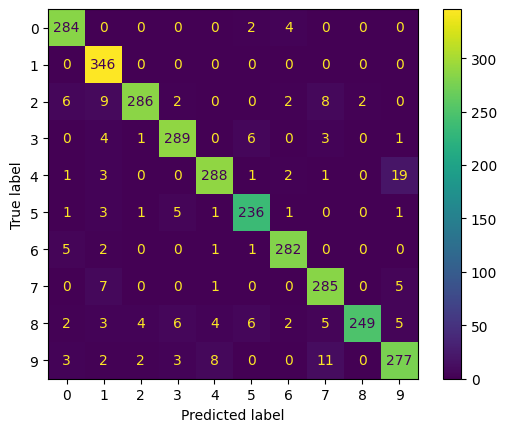

In [285]:
plt.figure(figsize=(3, 2))
fig = ConfusionMatrixDisplay(KNN_CM)
fig.plot()

Decisiion Tree Classifier

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [287]:
tree = DecisionTreeClassifier()

In [288]:
start = time.time()
tree.fit(X_train, y_train)
end = time.time()

In [289]:
tree_pred = tree.predict(X_test)

precision = precision_score(y_test,tree_pred, average='weighted')
accuracy = accuracy_score(y_test,tree_pred)
recall = recall_score(y_test,tree_pred, average='weighted')
f1_sc = f1_score(y_test,tree_pred, average='weighted')
tree_CM = confusion_matrix(y_test, tree_pred)
print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', tree_CM)

Time for Training:  2.008908987045288
precision: 0.7873861677334653
accuracy: 0.7863333333333333
recall: 0.7863333333333333
f1_score: 0.7864152781531412
Confision Matrix [[250   1   5   5   1  10  12   4   2   0]
 [  1 316   5   6   5   3   2   3   4   1]
 [  7   1 239  10   3   8  12  14  15   6]
 [  3   3  16 225   6  25   3   6   9   8]
 [  2   0  11   5 227   7  13  10  12  28]
 [  4   2   6  21   6 181  10   5   5   9]
 [  7   0  11   3  12   4 244   2   5   3]
 [  3   1  11   2  12   2   2 245   3  17]
 [  6   7  15  12   9   6   5  13 200  13]
 [  3   0   6   9  22   3  11  13   7 232]]


In [290]:
# Adding the results in comparison df
Comparison['Decisiion Tree Classifier'] = [precision, accuracy, recall, f1_sc, end - start]

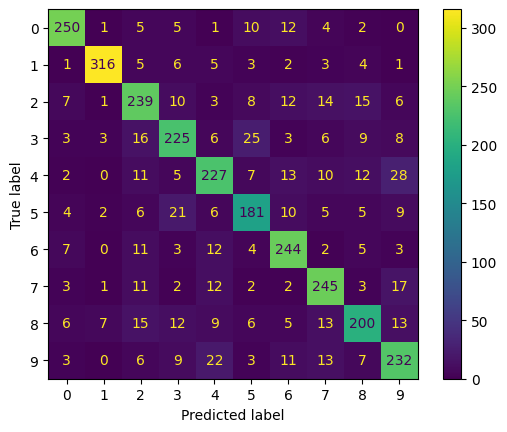

In [291]:
fig = ConfusionMatrixDisplay(tree_CM)
fig.plot()

Random Forest Classification

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
Random_forest = RandomForestClassifier(random_state=42)

In [294]:
start = time.time()
Random_forest.fit(X_train, y_train)
end = time.time()

In [295]:
Random_F_Pred = Random_forest.predict(X_test)

precision = precision_score(y_test,Random_F_Pred, average='weighted')
accuracy = accuracy_score(y_test,Random_F_Pred)
recall = recall_score(y_test,Random_F_Pred, average='weighted')
f1_sc = f1_score(y_test,Random_F_Pred, average='weighted')
RF_CM = confusion_matrix(y_test, Random_F_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', RF_CM)

Time for Training:  7.834914445877075
precision: 0.9436345631533449
accuracy: 0.9433333333333334
recall: 0.9433333333333334
f1_score: 0.9433756047605578
Confision Matrix [[282   0   0   0   0   2   5   0   1   0]
 [  0 340   1   1   0   0   2   1   1   0]
 [  3   0 294   3   4   0   2   6   3   0]
 [  1   0   7 286   0   5   0   5   0   0]
 [  2   0   1   1 288   0   3   0   2  18]
 [  0   0   0   3   1 235   3   2   2   3]
 [  7   0   1   0   2   2 277   0   2   0]
 [  2   0   5   0   1   0   0 281   0   9]
 [  1   2   3   3   3   1   0   3 265   5]
 [  3   2   1   3   8   1   0   4   2 282]]


In [296]:
# Adding the results in comparison df
Comparison['Random Forest Classification'] = [precision, accuracy, recall, f1_sc, end - start]

<Figure size 200x200 with 0 Axes>

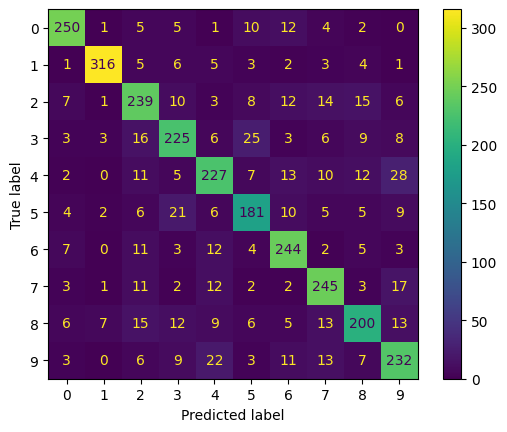

In [297]:
plt.figure(figsize=(2, 2))
fig = ConfusionMatrixDisplay(tree_CM)
fig.plot()

Support Vector Machines

In [298]:
from sklearn.svm import SVC

In [299]:
SVM_Model = SVC(kernel='linear')

In [300]:
start = time.time()
SVM_Model.fit(X_train,y_train)
end = time.time()

In [301]:
SVC_Pred = SVM_Model.predict(X_test)

precision = precision_score(y_test,SVC_Pred, average='weighted')
accuracy = accuracy_score(y_test,SVC_Pred)
recall = recall_score(y_test,SVC_Pred, average='weighted')
f1_sc = f1_score(y_test,SVC_Pred, average='weighted')
SVC_CM = confusion_matrix(y_test, SVC_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', SVC_CM)

Time for Training:  4.272294521331787
precision: 0.9249656031713168
accuracy: 0.9246666666666666
recall: 0.9246666666666666
f1_score: 0.9244364293090763
Confision Matrix [[281   0   1   2   0   3   2   0   1   0]
 [  0 341   1   0   0   1   1   0   1   1]
 [  4   0 295   1   5   2   2   2   2   2]
 [  0   2  10 277   1   9   0   4   1   0]
 [  0   0   5   1 293   1   3   0   0  12]
 [  1   3   2   9   2 220   3   2   4   3]
 [  5   1   2   0   2   3 275   1   2   0]
 [  2   2   4   1   6   0   0 279   0   4]
 [  2   3   8  10   4   5   1   6 245   2]
 [  1   2   1   4  17   1   0   8   4 268]]


In [302]:
# Adding the results in comparison df
Comparison['Support Vector Machines'] = [precision, accuracy, recall, f1_sc, end - start]

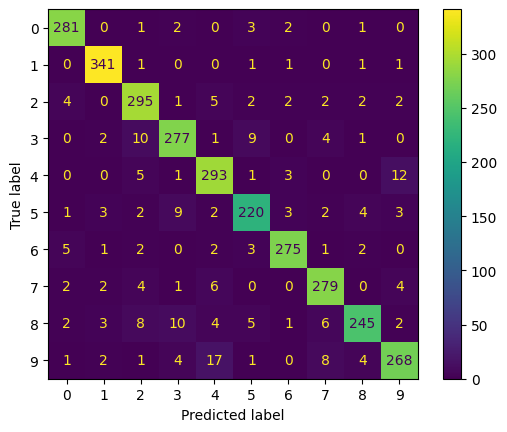

In [303]:
fig = ConfusionMatrixDisplay(SVC_CM)
fig.plot()

In [304]:
Comparison

,SGD-Logistic Regression,K-Nearest Neighbors Classifier,Decisiion Tree Classifier,Random Forest Classification,Support Vector Machines
Precision,0.885968,0.942002,0.787386,0.943635,0.924966
Accuracy,0.885333,0.940667,0.786333,0.943333,0.924667
Recall,0.885333,0.940667,0.786333,0.943333,0.924667
F1 Score,0.885368,0.940475,0.786415,0.943376,0.924436
time,12.143859,0.003278,2.008909,7.834914,4.272295


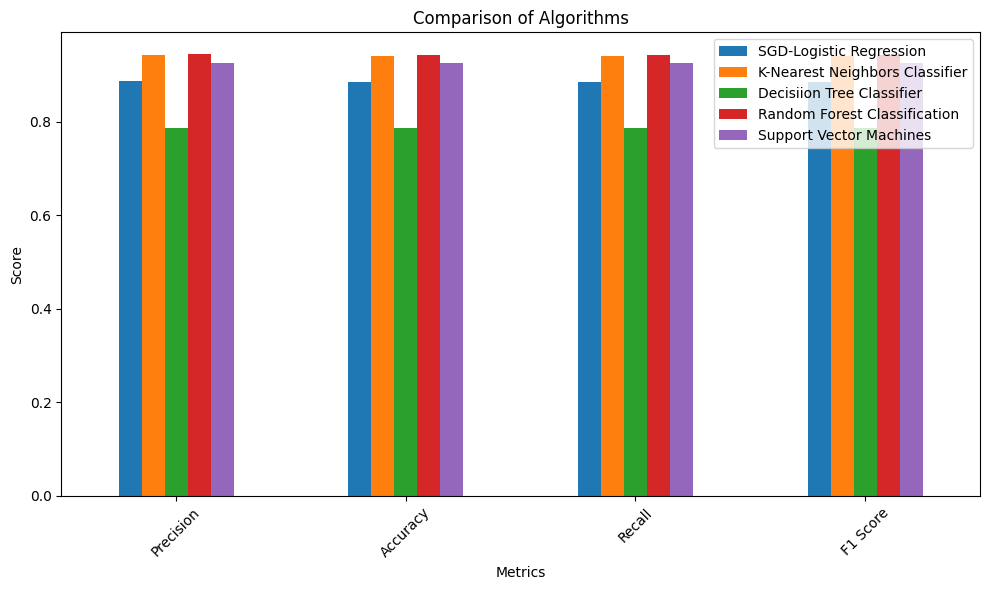

In [305]:
# prompt: Draw a comparison plot for the parameters obtained in the comparison plot of the different algorithms
Comparison = Comparison.drop('time')
Comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Algorithms')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()